#### 01 Importing Libraries

In [1]:
# ImportLibraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 02 Importing Dataset

In [2]:
# Path
path = r'C:\Users\monik\Desktop\Career Foundry\Course\Data Immersion\4 Python\07.2025 Instacart Basket Analysis - Monika Kaniewska'

In [ ]:
# Importing dataset
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer.pkl'))

#### 03 Task

In [1]:
# Displaying all columns
pd.options.display.max_columns = None 

In [5]:
# Checking dataset
df_ords_prods_cust.head()


,order_id,user_id,purchase_sequence,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spender type,median_days_since_prior_order,order frequency,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both,Low-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


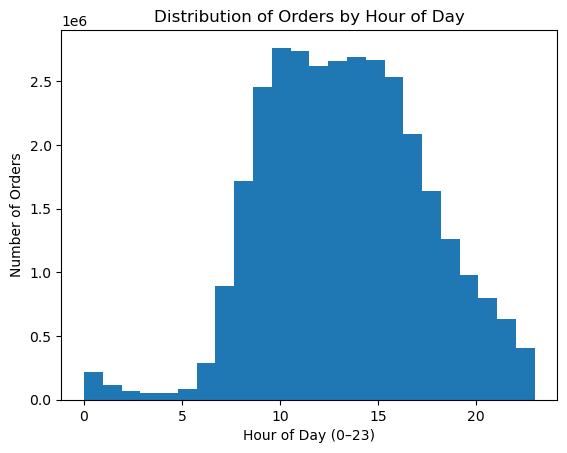

In [12]:
# Creating a histogram of the “order_hour_of_day” column.
hist = df_ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Orders')

plt.show()

The histogram demonstrates that the busiest hours of the day are from 9 - 16.

In [13]:
# Exporting histgram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

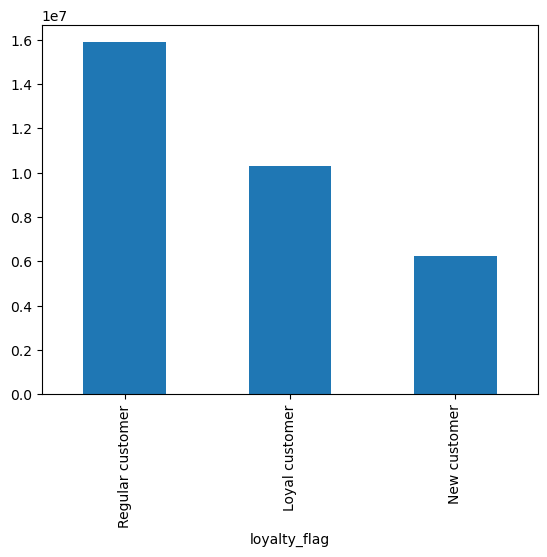

In [45]:
# Creating a bar chart from the “loyalty_flag” column.
bar = df_ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

Regular customers are the most common, followed by loyal ones, and then new customers.

In [46]:
# Exporting barchart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [25]:
# 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [4]:
# Turning odd outlier values into NaNs
df_ords_prods_cust.loc[df_ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [18]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_cust)) <= 0.7

In [19]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_cust[dev]
small = df_ords_prods_cust[~dev]

In [20]:
# Check the length of dataset
len(df_ords_prods_cust)

32404859

In [21]:
len(big) +len(small)

32404859

The length matches.

In [22]:
# Reducing the samples to only those columns necessary for the chart
df_2 = small[['order_hour_of_day','prices']]

In [23]:
df_2.describe()

,order_hour_of_day,prices
count,9.721098e+06,9.719595e+06
mean,1.342395e+01,7.791766e+00
std,4.246132e+00,4.241195e+00
min,0.000000e+00,1.000000e+00
25%,1.000000e+01,4.200000e+00
50%,1.300000e+01,7.400000e+00
75%,1.600000e+01,1.130000e+01
max,2.300000e+01,2.500000e+01


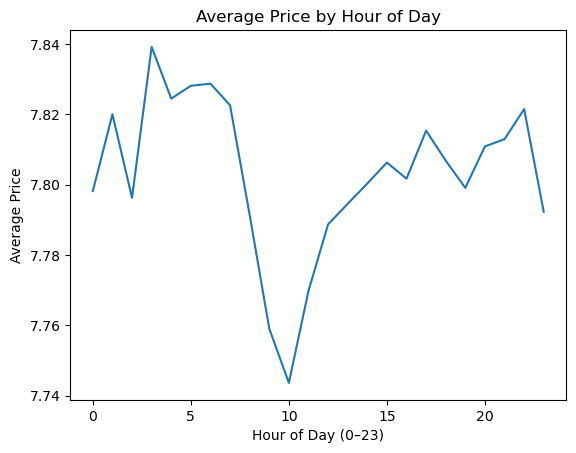

In [24]:
# Grouping by hour and calculating mean price
hourly_prices = df_2.groupby('order_hour_of_day')['prices'].mean().reset_index()

# Creating line plot
line = sns.lineplot(data=hourly_prices, x='order_hour_of_day', y='prices')

# Adding labels and title
plt.title('Average Price by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Average Price')

# Showing plot
plt.show()

Customer spending per item stays fairly consistent throughout the day, with a slight increase in the early morning and late afternoon, and decline around 10. Therefore, Instacart should promote premium or higher-margin products during these times.

In [25]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_price.png'))

In [36]:
# 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [26]:
df_3 = small[['age','n_dependants']]

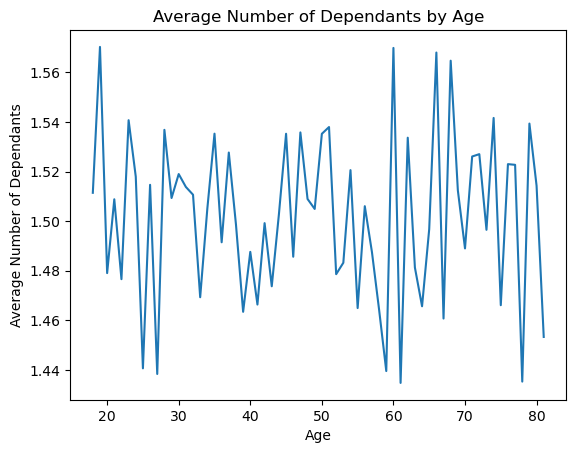

In [27]:
age_dependants = df_3.groupby('age')['n_dependants'].mean().reset_index()

line = sns.lineplot(data=age_dependants, x='age', y='n_dependants')

plt.title('Average Number of Dependants by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Dependants')

plt.show()

The line chart shows, that there is no clear connection between the age and the number of dependants.

In [ ]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [39]:
# 7. Explore whether there’s a connection between age and spending power (income).

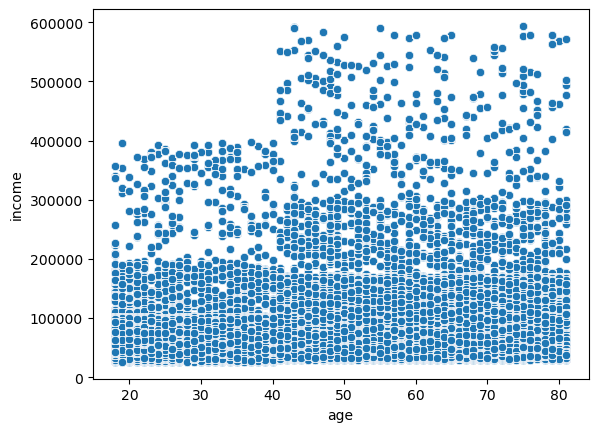

In [49]:
scat = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_cust)

In [50]:
# Exporting scatterplot
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

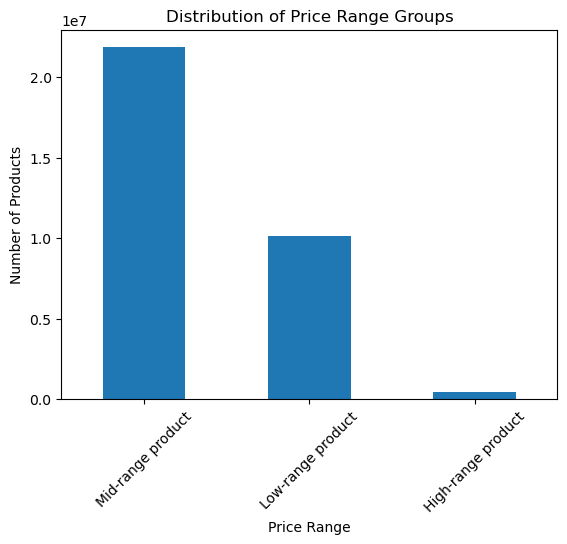

In [8]:
# 4 Create a bar chart from the “price_range_loc” column.
bar1 = df_ords_prods_cust['price_range_loc'].value_counts().plot.bar()

plt.title('Distribution of Price Range Groups')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [10]:
# Exporting barchart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))